<a href="https://colab.research.google.com/github/vsoos/CloudComputing/blob/main/ex1/1_2_cpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Version 2 - Spam Filter with NLP and Naïve-Bayes (Multilingual)

In [ ]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
folder_path = '/content/drive/MyDrive/cloudcomputing2023_VincenzinaSoos/ex1'
os.chdir(folder_path)

In [ ]:
df_en = pd.read_csv('data/emails.csv')
df_multi = pd.read_csv('data/multilingual.csv')

## Data visualisation

In [ ]:
df_en.head()

,Text,Spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
df_multi.head()

,labels,text,text_hi,text_de,text_fr
0,ham,"Go until jurong point, crazy.. Available only ...","Dakag बिंदु तक जाओ, पागल. केवल Bag Non महान वि...","Gehen Sie bis jurong Punkt, verrückt.. Verfügb...","Allez jusqu'à Jurong point, fou.. Disponible s..."
1,ham,Ok lar... Joking wif u oni...,ओके लामर.... if if uue पर.,Ok Lar... joking wif u oni...,J'ai fait une blague sur le wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Fktatatat 21 मई को प्राप्त करने के लिए मुफ्त प...,Freier Eintritt in 2 a wkly comp zum Gewinn FA...,Entrée libre dans 2 a wkly comp pour gagner FA...
3,ham,U dun say so early hor... U c already then say...,Uden इतना जल्दी कहते हैं... तो पहले से ही यूसी...,U dun sagen so früh... U c schon dann sagen...,U dun dit si tôt hor... U c déjà dire alors...
4,ham,"Nah I don't think he goes to usf, he lives aro...","नहीं, मुझे नहीं लगता कि वह हमारे लिए चला जाता ...","Nein, ich glaube nicht, dass er zu unsf geht, ...","Non, je ne pense pas qu'il va à usf, il vit da..."


In [ ]:
df_en['Text'] = df_en['Text'].str.replace('Subject:', '', regex=False)
df_en.dropna(inplace=True)

In [ ]:
df_fr = df_multi[['text_fr', 'labels']].dropna()
df_fr.rename(columns={'text_fr': 'Text', 'labels': 'Spam'}, inplace=True)

In [ ]:
df_fr.head()

,Text,Spam
0,"Allez jusqu'à Jurong point, fou.. Disponible s...",ham
1,J'ai fait une blague sur le wif u oni...,ham
2,Entrée libre dans 2 a wkly comp pour gagner FA...,spam
3,U dun dit si tôt hor... U c déjà dire alors...,ham
4,"Non, je ne pense pas qu'il va à usf, il vit da...",ham


In [ ]:
df_fr['Spam'] = df_fr['Spam'].map({'ham': 0, 'spam': 1})

In [ ]:
df = pd.concat([df_en, df_fr], ignore_index=True)

In [ ]:
mapping = {0: 'Not Spam', 1: 'Spam'}

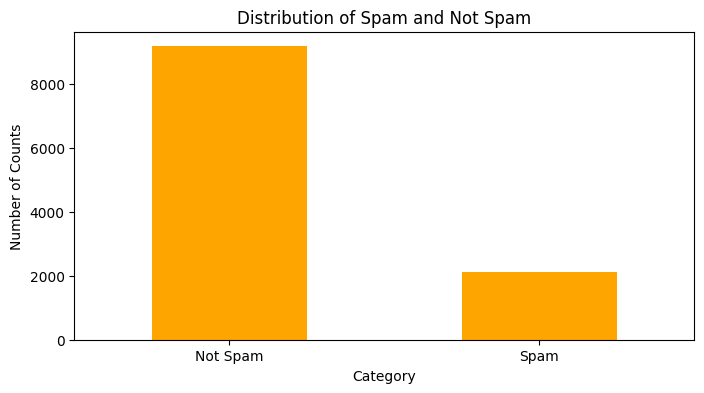

In [ ]:
plt.figure(figsize=(8, 4))
spam_map = df['Spam'].map(mapping).value_counts().plot(kind='bar', color='orange', rot=0)

plt.title('Distribution of Spam and Not Spam')
plt.xlabel('Category')
plt.ylabel('Number of Counts')
plt.show()

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Text'])
Y = df['Spam'].values

## Classification
###French + English

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
mnb = MultinomialNB() # create naive bayes model
model = mnb.fit(X_train, Y_train) # train model

In [ ]:
test_predictions = model.predict(X_test)

In [ ]:
target = [mapping[key] for key in sorted(mapping)]

In [ ]:
print(classification_report(Y_test, test_predictions, target_names=target))

              precision    recall  f1-score   support

    Not Spam       1.00      0.96      0.98      1819
        Spam       0.87      0.98      0.92       441

    accuracy                           0.97      2260
   macro avg       0.93      0.97      0.95      2260
weighted avg       0.97      0.97      0.97      2260



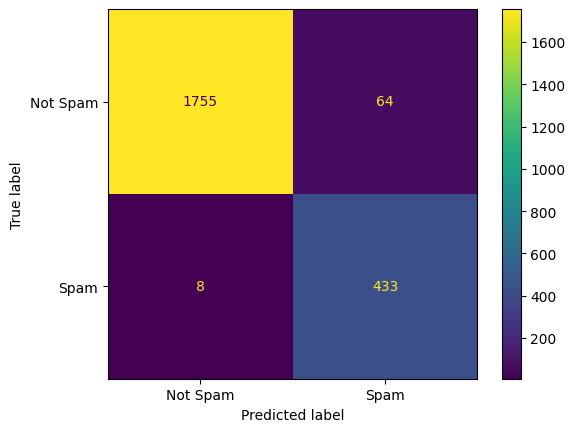

In [ ]:
# confusion matrix
cm = confusion_matrix(Y_test, test_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target)
disp.plot()
plt.show()

In [ ]:
sample_emails = ["Click the link below to WIN FREE MONEY AND",
                 "OTHER PRIZES!",
                 "Hey Jeff! Do you have time for a lunch tomorrow,",
                 "2PM or so?",
                 "Cliquez sur le lien ci-dessous pour GAGNER DE L'ARGENT GRATUIT ET D'AUTRES PRIX!",
                 "Salut Jeff! As-tu du temps pour un déjeuner demain"
                "vers 14h?"]
transformed_emails = vectorizer.transform(sample_emails)
predictions = model.predict(transformed_emails)

for email, label in zip(sample_emails, predictions):
    print(f'Email: "{email}"\nPrediction: {target[label]}\n')

Email: "Click the link below to WIN FREE MONEY AND"
Prediction: Spam

Email: "OTHER PRIZES!"
Prediction: Not Spam

Email: "Hey Jeff! Do you have time for a lunch tomorrow,"
Prediction: Not Spam

Email: "2PM or so?"
Prediction: Not Spam

Email: "Cliquez sur le lien ci-dessous pour GAGNER DE L'ARGENT GRATUIT ET D'AUTRES PRIX!"
Prediction: Spam

Email: "Salut Jeff! As-tu du temps pour un déjeuner demainvers 14h?"
Prediction: Not Spam



## EXTRA TASK - Add even more languages

In [ ]:
df_multi.head()

,labels,text,text_hi,text_de,text_fr
0,ham,"Go until jurong point, crazy.. Available only ...","Dakag बिंदु तक जाओ, पागल. केवल Bag Non महान वि...","Gehen Sie bis jurong Punkt, verrückt.. Verfügb...","Allez jusqu'à Jurong point, fou.. Disponible s..."
1,ham,Ok lar... Joking wif u oni...,ओके लामर.... if if uue पर.,Ok Lar... joking wif u oni...,J'ai fait une blague sur le wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Fktatatat 21 मई को प्राप्त करने के लिए मुफ्त प...,Freier Eintritt in 2 a wkly comp zum Gewinn FA...,Entrée libre dans 2 a wkly comp pour gagner FA...
3,ham,U dun say so early hor... U c already then say...,Uden इतना जल्दी कहते हैं... तो पहले से ही यूसी...,U dun sagen so früh... U c schon dann sagen...,U dun dit si tôt hor... U c déjà dire alors...
4,ham,"Nah I don't think he goes to usf, he lives aro...","नहीं, मुझे नहीं लगता कि वह हमारे लिए चला जाता ...","Nein, ich glaube nicht, dass er zu unsf geht, ...","Non, je ne pense pas qu'il va à usf, il vit da..."


In [ ]:
df_multi.dropna(inplace=True)

In [ ]:
df_multi.drop(['text', 'text_fr'], axis=1, inplace=True)

In [ ]:
df_multi['Text'] = df_multi['text_hi'] + df_multi['text_de']

In [ ]:
df_multi.head(1)

,labels,text_hi,text_de,Text
0,ham,"Dakag बिंदु तक जाओ, पागल. केवल Bag Non महान वि...","Gehen Sie bis jurong Punkt, verrückt.. Verfügb...","Dakag बिंदु तक जाओ, पागल. केवल Bag Non महान वि..."


In [ ]:
df_multi.rename(columns={ 'labels': 'Spam'}, inplace=True)

In [ ]:
df_multi.head()

,Spam,text_hi,text_de,Text
0,ham,"Dakag बिंदु तक जाओ, पागल. केवल Bag Non महान वि...","Gehen Sie bis jurong Punkt, verrückt.. Verfügb...","Dakag बिंदु तक जाओ, पागल. केवल Bag Non महान वि..."
1,ham,ओके लामर.... if if uue पर.,Ok Lar... joking wif u oni...,ओके लामर.... if if uue पर.Ok Lar... joking wif...
2,spam,Fktatatat 21 मई को प्राप्त करने के लिए मुफ्त प...,Freier Eintritt in 2 a wkly comp zum Gewinn FA...,Fktatatat 21 मई को प्राप्त करने के लिए मुफ्त प...
3,ham,Uden इतना जल्दी कहते हैं... तो पहले से ही यूसी...,U dun sagen so früh... U c schon dann sagen...,Uden इतना जल्दी कहते हैं... तो पहले से ही यूसी...
4,ham,"नहीं, मुझे नहीं लगता कि वह हमारे लिए चला जाता ...","Nein, ich glaube nicht, dass er zu unsf geht, ...","नहीं, मुझे नहीं लगता कि वह हमारे लिए चला जाता ..."


In [ ]:
df_multi['Spam'] = df_multi['Spam'].map({'ham': 0, 'spam': 1})

In [ ]:
df_multi.head()

,Spam,text_hi,text_de,Text
0,0,"Dakag बिंदु तक जाओ, पागल. केवल Bag Non महान वि...","Gehen Sie bis jurong Punkt, verrückt.. Verfügb...","Dakag बिंदु तक जाओ, पागल. केवल Bag Non महान वि..."
1,0,ओके लामर.... if if uue पर.,Ok Lar... joking wif u oni...,ओके लामर.... if if uue पर.Ok Lar... joking wif...
2,1,Fktatatat 21 मई को प्राप्त करने के लिए मुफ्त प...,Freier Eintritt in 2 a wkly comp zum Gewinn FA...,Fktatatat 21 मई को प्राप्त करने के लिए मुफ्त प...
3,0,Uden इतना जल्दी कहते हैं... तो पहले से ही यूसी...,U dun sagen so früh... U c schon dann sagen...,Uden इतना जल्दी कहते हैं... तो पहले से ही यूसी...
4,0,"नहीं, मुझे नहीं लगता कि वह हमारे लिए चला जाता ...","Nein, ich glaube nicht, dass er zu unsf geht, ...","नहीं, मुझे नहीं लगता कि वह हमारे लिए चला जाता ..."


In [ ]:
df_multi.drop(['text_hi', 'text_de'], axis=1, inplace=True)

In [ ]:
df_multi.head()

,Spam,Text
0,0,"Dakag बिंदु तक जाओ, पागल. केवल Bag Non महान वि..."
1,0,ओके लामर.... if if uue पर.Ok Lar... joking wif...
2,1,Fktatatat 21 मई को प्राप्त करने के लिए मुफ्त प...
3,0,Uden इतना जल्दी कहते हैं... तो पहले से ही यूसी...
4,0,"नहीं, मुझे नहीं लगता कि वह हमारे लिए चला जाता ..."


In [ ]:
df_plus = pd.concat([df, df_multi], ignore_index=True)

In [ ]:
df_plus.head()

,Text,Spam
0,naturally irresistible your corporate identit...,1
1,the stock trading gunslinger fanny is merril...,1
2,unbelievable new homes made easy im wanting ...,1
3,4 color printing special request additional ...,1
4,"do not have money , get software cds from her...",1


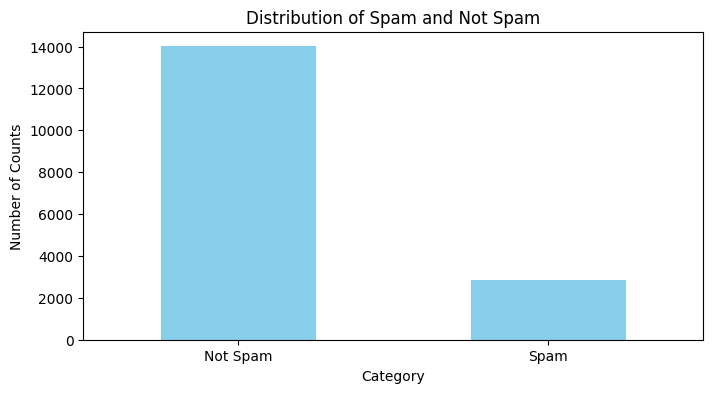

In [ ]:
plt.figure(figsize=(8, 4))
spam_map = df_plus['Spam'].map(mapping).value_counts().plot(kind='bar', color='skyblue', rot=0)

plt.title('Distribution of Spam and Not Spam')
plt.xlabel('Category')
plt.ylabel('Number of Counts')
plt.show()

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Text'])
Y = df['Spam'].values

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
mnb = MultinomialNB()
model = mnb.fit(X_train, Y_train)

In [ ]:
test_predictions = model.predict(X_test)

In [ ]:
print(classification_report(Y_test, test_predictions, target_names=target))

              precision    recall  f1-score   support

    Not Spam       1.00      0.96      0.98      1819
        Spam       0.87      0.98      0.92       441

    accuracy                           0.97      2260
   macro avg       0.93      0.97      0.95      2260
weighted avg       0.97      0.97      0.97      2260



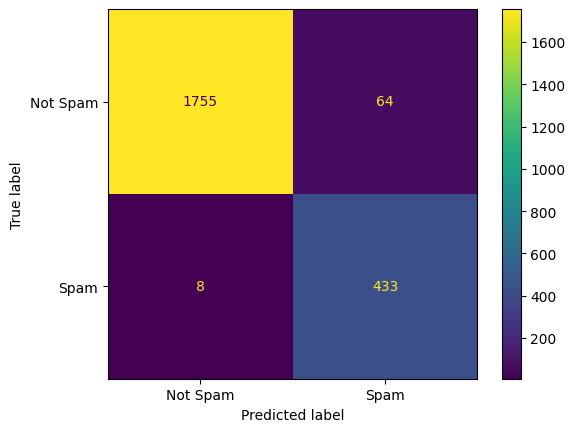

In [ ]:
# Display confusion matrix
cm = confusion_matrix(Y_test, test_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target)
disp.plot()
plt.show()

In [ ]:
# generated random messages in hindi, french and german
sample_emails = [
    "Click the link below to WIN FREE MONEY AND",  # English, spam
    "Hey Jeff! Do you have time for a lunch tomorrow, 2PM or so?",  # English, not spam
    "Cliquez sur le lien ci-dessous pour GAGNER DE L'ARGENT GRATUIT ET D'AUTRES PRIX!",  # French, spam
    "Salut Jeff! As-tu du temps pour un déjeuner demain vers 14h?",  # French, not spam
    "Klicken Sie unten, um KOSTENLOSES GELD UND PREISE ZU GEWINNEN!",  # German, spam
    "Hallo Jeff! Hast du morgen Zeit für ein Mittagessen um 14 Uhr?",  # German, not spam
    "नीचे दिए गए लिंक पर क्लिक करें और मुफ्त में पैसे जीतें!",  # Hindi, spam
    "नमस्ते जेफ! क्या आपके पास कल दोपहर के भोजन के लिए समय है, दोपहर के 2 बजे के आसपास?",  # Hindi, not spam
]

transformed_emails = vectorizer.transform(sample_emails)
predictions = model.predict(transformed_emails)

In [ ]:
for email, label in zip(sample_emails, predictions):
    print(f'Email: "{email}"\nPrediction: {target[label]}\n')

Email: "Click the link below to WIN FREE MONEY AND"
Prediction: Spam

Email: "Hey Jeff! Do you have time for a lunch tomorrow, 2PM or so?"
Prediction: Not Spam

Email: "Cliquez sur le lien ci-dessous pour GAGNER DE L'ARGENT GRATUIT ET D'AUTRES PRIX!"
Prediction: Spam

Email: "Salut Jeff! As-tu du temps pour un déjeuner demain vers 14h?"
Prediction: Not Spam

Email: "Klicken Sie unten, um KOSTENLOSES GELD UND PREISE ZU GEWINNEN!"
Prediction: Spam

Email: "Hallo Jeff! Hast du morgen Zeit für ein Mittagessen um 14 Uhr?"
Prediction: Not Spam

Email: "नीचे दिए गए लिंक पर क्लिक करें और मुफ्त में पैसे जीतें!"
Prediction: Not Spam

Email: "नमस्ते जेफ! क्या आपके पास कल दोपहर के भोजन के लिए समय है, दोपहर के 2 बजे के आसपास?"
Prediction: Not Spam



## EXTRA TASK - Translation module (Hungarian)

In [ ]:
!pip install -q googletrans==4.0.0-rc1

In [ ]:
from googletrans import Translator
import json
import re
from tqdm import tqdm

In [ ]:
df_en = pd.read_csv('data/emails.csv')

In [ ]:
translator = Translator()

In [ ]:
# Convert the 'Text' column to strings
df_en['Text'] = df_en['Text'].astype('string')
df_en.dropna(inplace=True)
print(df_en['Text'].isnull().sum())

0


In [ ]:
len(df_en)

5728

In [ ]:
print(df_en['Text'].dtype)

string


In [ ]:
df_en['Text'] = df_en['Text'].astype(str)

In [ ]:
df_en['Text'] = df_en['Text'].str.replace('Subject:', '', regex=False)
df_en.dropna(inplace=True)
df_en.head()

,Text,Spam
0,naturally irresistible your corporate identit...,1
1,the stock trading gunslinger fanny is merril...,1
2,unbelievable new homes made easy im wanting ...,1
3,4 color printing special request additional ...,1
4,"do not have money , get software cds from her...",1


In [ ]:
# clean text
def clean_text(text):
    if not isinstance(text, str):
        return None  # only valid strings
    # remove everything except A-Z, a-z, and 0-9
    cleaned = re.sub(r'[^A-Za-z0-9]+', ' ', text)
    cleaned = re.sub(r'\s+', ' ', cleaned).strip()
    return cleaned if cleaned else None

In [ ]:
df_en['Text'] = df_en['Text'].astype(str).apply(clean_text)

In [ ]:
df_en.head()

,Text,Spam
0,naturally irresistible your corporate identity...,1
1,the stock trading gunslinger fanny is merrill ...,1
2,unbelievable new homes made easy im wanting to...,1
3,4 color printing special request additional in...,1
4,do not have money get software cds from here s...,1


In [ ]:
# Sample data to 80/20 ratio with max 1000
max_rows = 1000
non_spam_count = int(max_rows * 0.8)
spam_count = max_rows - non_spam_count

non_spam_df = df_en[df_en['Spam'] == 0].sample(n=min(non_spam_count, len(df_en[df_en['Spam'] == 0])), random_state=42)
spam_df = df_en[df_en['Spam'] == 1].sample(n=min(spam_count, len(df_en[df_en['Spam'] == 1])), random_state=42)

# cncat and shuffle
df_sampled = pd.concat([non_spam_df, spam_df]).sample(frac=1, random_state=42).reset_index(drop=True)

print("Non-spam samples:", len(non_spam_df))
print("Spam samples:", len(spam_df))
print("Total samples:", len(df_sampled))

Non-spam samples: 800
Spam samples: 200
Total samples: 1000


In [ ]:
df_sampled['Text'] = df_sampled['Text'].apply(clean_text)
df_sampled = df_sampled.dropna(subset=['Text']).reset_index(drop=True)

In [ ]:
df_sampled.head()

,Text,Spam
0,the ferc staff report on western markets and t...,0
1,research allocations to egm hi becky vince and...,0
2,gt symposium on qcf april 7 please share the f...,0
3,re clustering for power tanya as we discussed ...,0
4,confirmation of your order this is an automati...,0


In [ ]:
translations = []
skipped_rows = []

for index, row in tqdm(df_sampled.iterrows(), total=len(df_sampled), desc="Translating rows"):
    try:
        # Attempt translation
        translated = translator.translate(row['Text'], dest='hu')
        translations.append(translated.text)
    except Exception as e:
        skipped_rows.append(row)  # save problematic row
        translations.append(None)

Translating rows: 100%|██████████| 1000/1000 [18:26<00:00,  1.11s/it]


In [ ]:
# translations back to df as columns
df_sampled['Hungarian_Text'] = translations
df_translated = df_sampled.copy()

In [ ]:
# df for skipped rows
df_skipped = pd.DataFrame(skipped_rows)
print(f"\nTranslation completed. Skipped {len(df_skipped)} rows.")
print("Skipped rows saved to df_skipped.")


Translation completed. Skipped 36 rows.
Skipped rows saved to df_skipped.


In [ ]:
print("Translated Data:")
df_translated.head()

Translated Data:


,Text,Spam,Hungarian_Text
0,the ferc staff report on western markets and t...,0,A FERC személyzetének jelentése a nyugati piac...
1,research allocations to egm hi becky vince and...,0,"Kutatási allokációk az EGM -hez, Hi Becky Vinc..."
2,gt symposium on qcf april 7 please share the f...,0,None
3,re clustering for power tanya as we discussed ...,0,"A Power Tanya csoportosítása, ahogyan az utols..."
4,confirmation of your order this is an automati...,0,Megrendelésének megerősítése Ez a megadott kér...


In [ ]:
print("\nSkipped Rows:")
df_skipped.head()


Skipped Rows:


,Text,Spam
2,gt symposium on qcf april 7 please share the f...,0
8,start your trading day with a bang homeland se...,1
9,iso new england and pjm propose standard marke...,0
44,re fw pserc nuggets related to market stem hi ...,0
49,grab this quick triple at its low homeland sec...,1


In [ ]:
df_stacked = pd.melt(
    df_translated,
    id_vars=['Spam'],
    value_vars=['Text', 'Hungarian_Text'],
    value_name='Text_Combined'
)

df_stacked = df_stacked.reset_index(drop=True)
df_stacked.head()

,Spam,variable,Text_Combined
0,0,Text,the ferc staff report on western markets and t...
1,0,Text,research allocations to egm hi becky vince and...
2,0,Text,gt symposium on qcf april 7 please share the f...
3,0,Text,re clustering for power tanya as we discussed ...
4,0,Text,confirmation of your order this is an automati...


In [ ]:
df_stacked = df_stacked.drop(columns=['variable'])

In [ ]:
df_stacked.head()

,Spam,Text_Combined
0,0,the ferc staff report on western markets and t...
1,0,research allocations to egm hi becky vince and...
2,0,gt symposium on qcf april 7 please share the f...
3,0,re clustering for power tanya as we discussed ...
4,0,confirmation of your order this is an automati...


In [ ]:
print(df_stacked['Text_Combined'].isnull().sum())

36


In [ ]:
df_stacked = df_stacked.dropna(subset=['Text_Combined']).reset_index(drop=True)

In [ ]:
# Classification with Naive Bayes
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_stacked['Text_Combined'])
Y = df_stacked['Spam'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Train the model
mnb = MultinomialNB()
model = mnb.fit(X_train, Y_train)

In [ ]:
# Evaluate the model
test_predictions = model.predict(X_test)

In [ ]:
mapping = {0: 'Not Spam', 1: 'Spam'}
target = [mapping[key] for key in sorted(mapping)]

print("\nClassification Report:")
print(classification_report(Y_test, test_predictions, target_names=target))


Classification Report:
              precision    recall  f1-score   support

    Not Spam       0.99      0.98      0.99       308
        Spam       0.94      0.96      0.95        85

    accuracy                           0.98       393
   macro avg       0.97      0.97      0.97       393
weighted avg       0.98      0.98      0.98       393



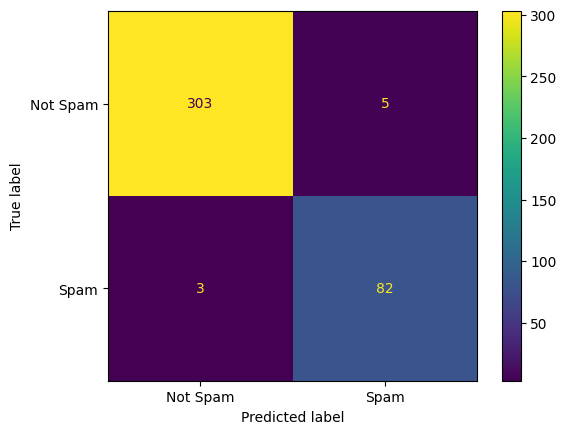

In [ ]:
cm = confusion_matrix(Y_test, test_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target)
disp.plot()
plt.show()

In [ ]:
sample_emails = [
    "Click the link below to WIN FREE MONEY AND",
    "OTHER PRIZES!",
    "Hey Jeff! Do you have time for a lunch tomorrow,",
    "2PM or so?",
    "Kattints az alábbi linkre, hogy INGYENES PÉNZT NYERJ ÉS",
    "TOVÁBBI NYEREMÉNYEKET!",
    "Szia Jeff! Van időd holnap egy ebédre,",
    "Délután 2 körül?",
]


transformed_emails = vectorizer.transform(sample_emails)
predictions = model.predict(transformed_emails)

for email, label in zip(sample_emails, predictions):
    print(f'Email: "{email}"\nPrediction: {mapping[label]}\n')

Email: "Click the link below to WIN FREE MONEY AND"
Prediction: Spam

Email: "OTHER PRIZES!"
Prediction: Not Spam

Email: "Hey Jeff! Do you have time for a lunch tomorrow,"
Prediction: Not Spam

Email: "2PM or so?"
Prediction: Not Spam

Email: "Kattints az alábbi linkre, hogy INGYENES PÉNZT NYERJ ÉS"
Prediction: Spam

Email: "TOVÁBBI NYEREMÉNYEKET!"
Prediction: Not Spam

Email: "Szia Jeff! Van időd holnap egy ebédre,"
Prediction: Not Spam

Email: "Délután 2 körül?"
Prediction: Not Spam

